In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('healthinsurance.csv')

# data undestading 
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [3]:
df.shape

(15000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


 we have catogerical values 
 sex
 hereditary_diseases
 city
 job_title

In [5]:
# checking the missing values 
df.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

to handle missing values we can use two method 
imputation == cenral tendancy which is mean median and mode 
dropping

<Axes: xlabel='age', ylabel='Count'>

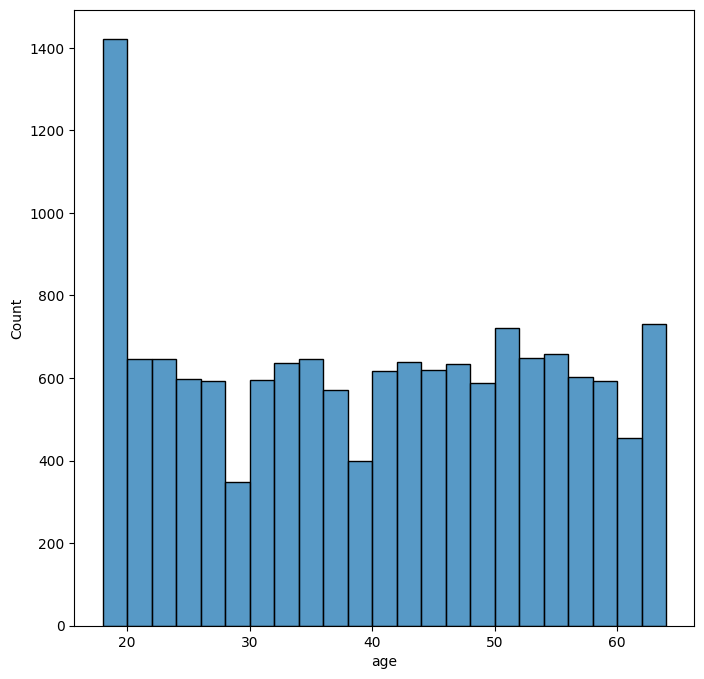

In [6]:
# i am using the imputaion method here to handle missing values 
# ananlysis the distribution of data in age column

fig, ax= plt.subplots(figsize=(8,8))
# sns.distplot(df.age)
sns.histplot(df.age)

<Axes: xlabel='bmi', ylabel='Count'>

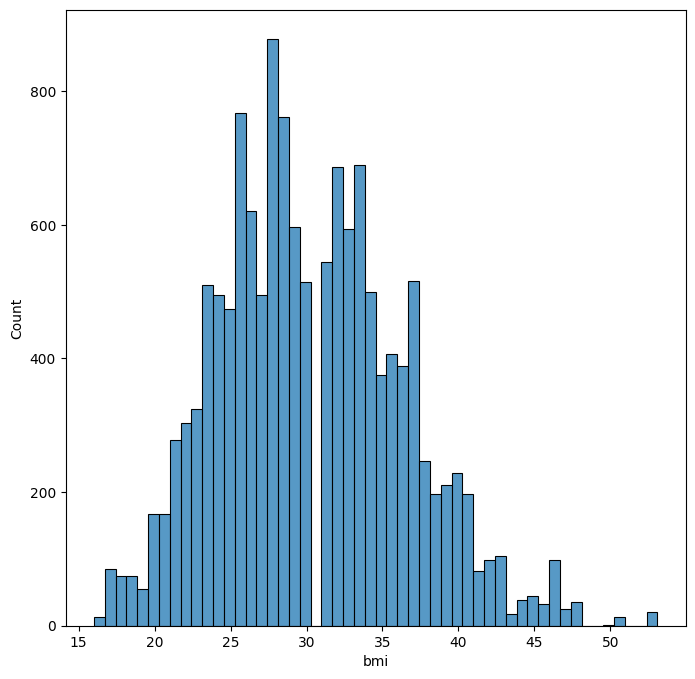

In [7]:
fig, ax= plt.subplots(figsize=(8,8))
sns.histplot(df.bmi)

In [8]:
df.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [9]:
df[['age', 'bmi']] = df[['age', 'bmi']].fillna(df[['age', 'bmi']].median())


In [10]:
df.isnull().sum()


age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

In [11]:

df.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.559467,64.909600,30.211193,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,13.829896,13.701935,5.928386,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.900000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,51.000000,76.000000,34.100000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


C:\Users\arpita\AppData\Local\Temp\ipykernel_15784\2159340773.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


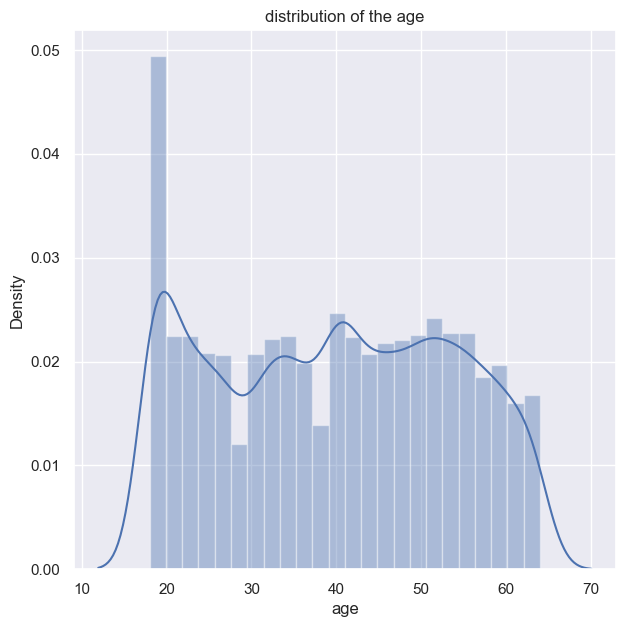

In [12]:
# distribution of age value 
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(df['age'])
plt.title('distribution of the age')
plt.show()




in the age distributon our dataset is distributed into the almost equle range but we have 20 years old persons more then others in our dataset.

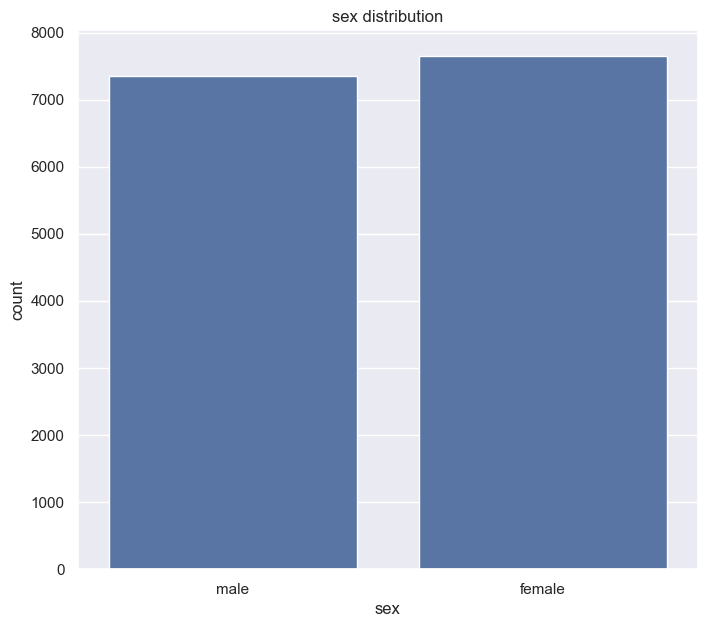

In [13]:
# gender
plt.figure(figsize=(8,7))
sns.countplot(x='sex', data= df)
plt.title('sex distribution')
plt.show()

# this graph is showing the count of male and female in the dataset 

In [14]:
df['sex'].value_counts()

sex
female    7652
male      7348
Name: count, dtype: int64

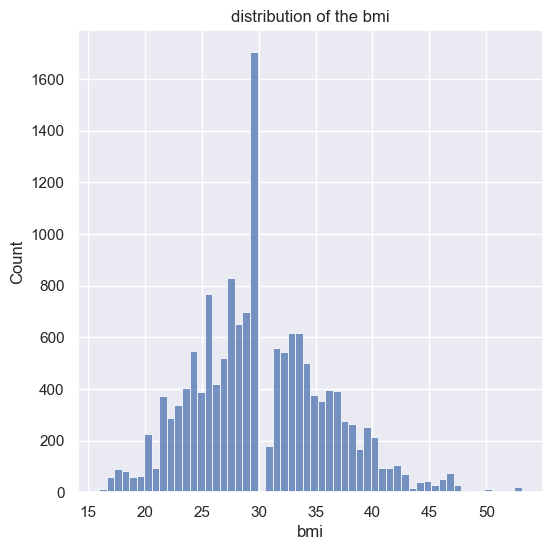

In [15]:
# bmi distribution in our datset
plt.figure(figsize=(6,6))
sns.histplot(df['bmi'])
plt.title('distribution of the bmi')
plt.show()


normal bmi range ====> 18.5 to 24.9

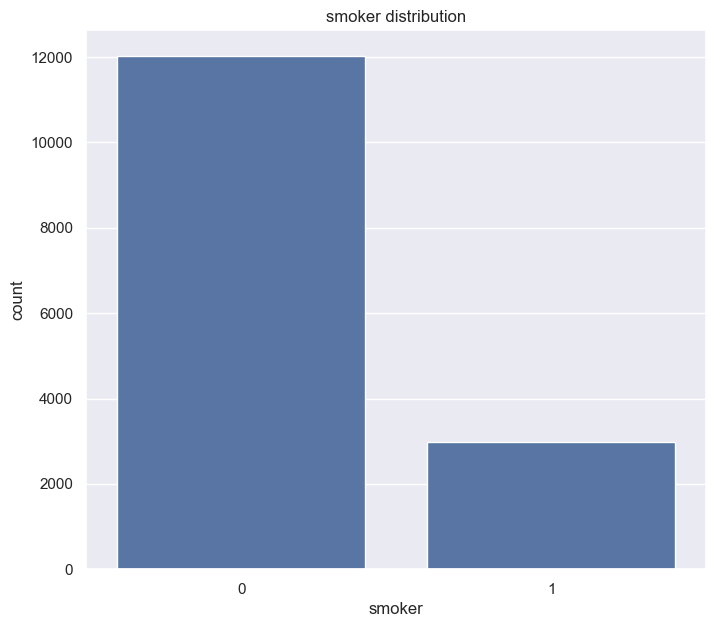

In [16]:
# smoker column 
plt.figure(figsize=(8,7))
sns.countplot(x='smoker', data= df)
plt.title('smoker distribution')
plt.show()

In [17]:
df['smoker'].value_counts()

smoker
0    12028
1     2972
Name: count, dtype: int64

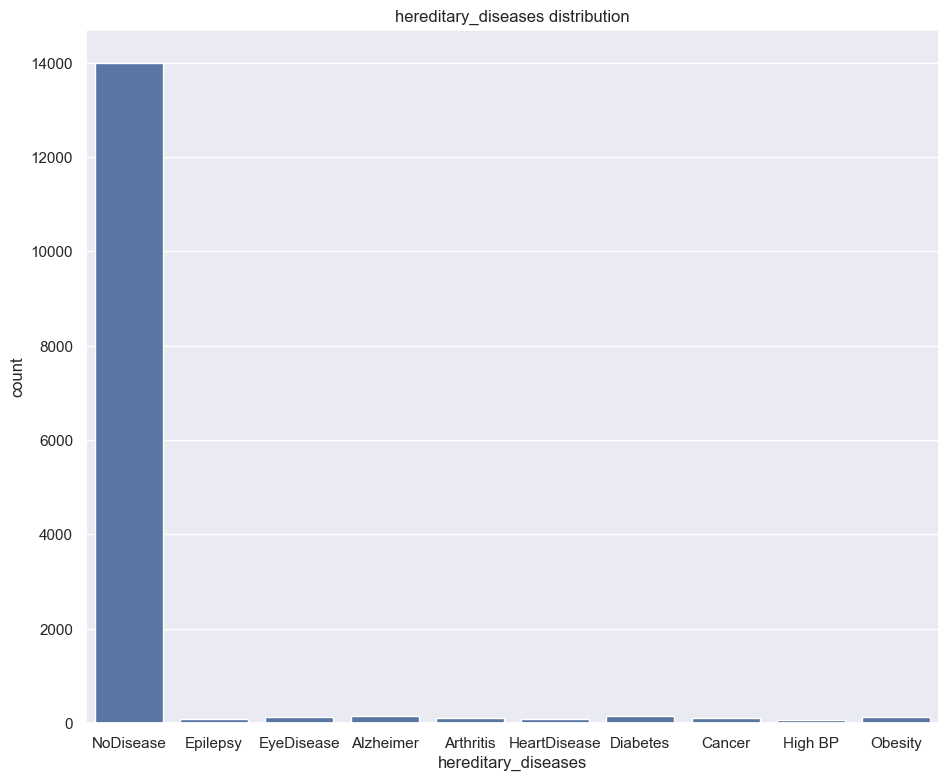

In [18]:
# hereditary_diseases column 
plt.figure(figsize=(11,9))
sns.countplot(x='hereditary_diseases', data= df)
plt.title('hereditary_diseases distribution')
plt.show()

In [19]:
df['city'].value_counts()

city
NewOrleans    302
Nashville     302
Charleston    298
Brimingham    298
Memphis       297
             ... 
Warwick        69
Trenton        69
York           69
Baltimore      69
Syracuse       69
Name: count, Length: 91, dtype: int64

In [20]:
# # hereditary_diseases column 
# plt.figure(figsize=(11,9))
# sns.histplot(df['city'])
# plt.title('city distribution')
# plt.show()

In [21]:
df['hereditary_diseases'].value_counts()

hereditary_diseases
NoDisease       13998
Diabetes          148
Alzheimer         144
Obesity           136
EyeDisease        123
Cancer            109
Arthritis          96
HeartDisease       93
Epilepsy           84
High BP            69
Name: count, dtype: int64

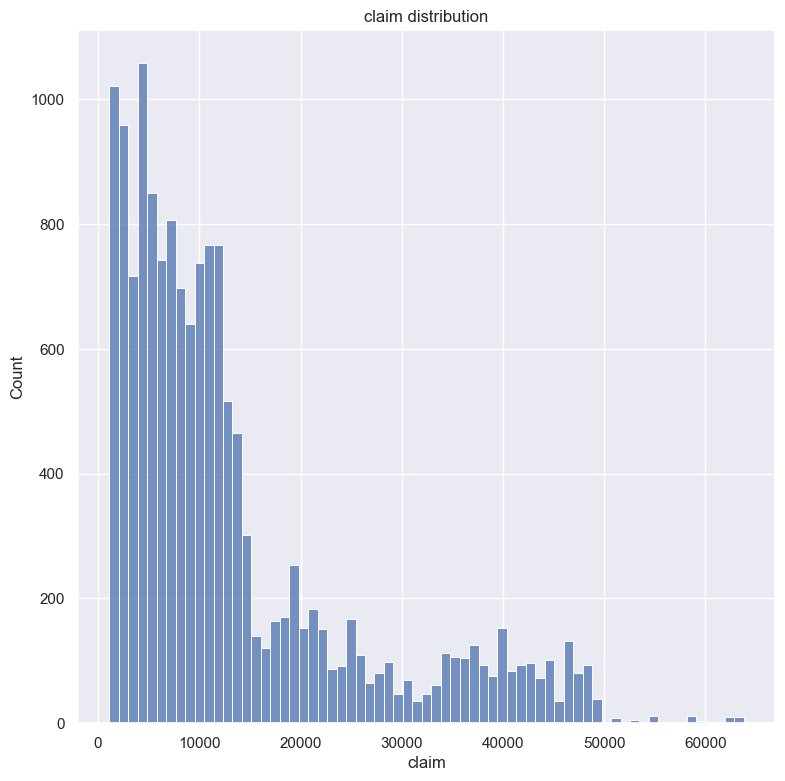

In [22]:
# hereditary_diseases column 
plt.figure(figsize=(9,9))
sns.histplot(df['claim'])
plt.title('claim distribution')
plt.show()

In [23]:
df['claim'].value_counts()

claim
14210.5    27
9715.8     26
18955.2    25
7256.7     24
2203.5     24
           ..
33584.2     1
35783.2     1
32885.1     1
22460.5     1
19214.1     1
Name: count, Length: 2054, dtype: int64

data preprocessing
encoding the categorical columns 

In [24]:
df.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

In [25]:
# lableencoding
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['hereditary_diseases']=le.fit_transform(df['hereditary_diseases'])
df['city']=le.fit_transform(df['city'])
df['job_title']=le.fit_transform(df['job_title'])


In [31]:
df['sex'].unique

<bound method Series.unique of 0        1
1        0
2        0
3        0
4        0
        ..
14995    1
14996    1
14997    1
14998    1
14999    1
Name: sex, Length: 15000, dtype: int32>

In [34]:
df.dtypes

age                    float64
sex                      int64
weight                   int64
bmi                    float64
hereditary_diseases      int64
no_of_dependents         int64
smoker                   int64
city                     int32
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title                int32
claim                  float64
dtype: object

In [35]:
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,1,64,24.3,8,1,0,55,72,0,0,2,13112.6
1,49.0,0,75,22.6,8,1,0,5,78,1,1,16,9567.0
2,32.0,0,64,17.8,4,2,1,63,88,1,1,0,32734.2
3,61.0,0,53,36.4,8,1,1,64,72,1,0,10,48517.6
4,19.0,0,50,20.6,8,0,0,8,82,1,0,22,1731.7


In [36]:
df.tail()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
14995,39.0,1,49,28.3,8,1,1,24,54,1,0,20,21082.2
14996,39.0,1,74,29.6,8,4,0,49,64,1,0,33,7512.3
14997,20.0,1,62,33.3,8,0,0,82,52,1,0,18,1391.5
14998,52.0,1,88,36.7,8,0,0,61,70,1,0,17,9144.6
14999,52.0,1,57,26.4,8,3,0,37,72,1,0,28,25992.8


In [41]:
# splitting and set target
X=df.drop(['claim'],axis=1)
Y=df['claim']

In [42]:
Y

0        13112.6
1         9567.0
2        32734.2
3        48517.6
4         1731.7
          ...   
14995    21082.2
14996     7512.3
14997     1391.5
14998     9144.6
14999    25992.8
Name: claim, Length: 15000, dtype: float64

In [43]:
X

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title
0,60.0,1,64,24.3,8,1,0,55,72,0,0,2
1,49.0,0,75,22.6,8,1,0,5,78,1,1,16
2,32.0,0,64,17.8,4,2,1,63,88,1,1,0
3,61.0,0,53,36.4,8,1,1,64,72,1,0,10
4,19.0,0,50,20.6,8,0,0,8,82,1,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,1,49,28.3,8,1,1,24,54,1,0,20
14996,39.0,1,74,29.6,8,4,0,49,64,1,0,33
14997,20.0,1,62,33.3,8,0,0,82,52,1,0,18
14998,52.0,1,88,36.7,8,0,0,61,70,1,0,17


In [44]:
# train and test
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [48]:
print(X.shape ,X_train.shape, y_train.shape)

(15000, 12) (10050, 12) (10050,)


In [57]:
# import models 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC  

In [58]:
classifiers = {
    "Linear Regression": LinearRegression ,
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

In [59]:
results = {}

for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the results
    results[name] = {
        "accuracy": accuracy,
        "classification_report": classification_report(y_test, y_pred, target_names=class_names),
       
    }

AttributeError: 'DataFrame' object has no attribute '_validate_params'